In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import featuretools as ft
from sklearn.preprocessing import Imputer

In [2]:
data= pd.read_csv('train_values.csv')
data1= pd.read_csv('test_values.csv')
label =pd.read_csv('train_labels.csv')
df = pd.read_csv('train_data.csv')

#### Note that all data types ith int64 are categorical features except the row_id
#### The other columns, that is float64 types are numerical features

In [16]:
df.dtypes

row_id                              int64
loan_type                           int64
property_type                       int64
loan_purpose                        int64
occupancy                           int64
loan_amount                         int64
preapproval                         int64
msa_md                              int64
state_code                          int64
county_code                         int64
applicant_ethnicity                 int64
applicant_race                      int64
applicant_sex                       int64
applicant_income                  float64
population                        float64
minority_population_pct           float64
ffiecmedian_family_income         float64
tract_to_msa_md_income_pct        float64
number_of_owner-occupied_units    float64
number_of_1_to_4_family_units     float64
lender                              int64
accepted                            int64
co_applicant_True                   uint8
dtype: object

In [3]:
#Handling categorical column, test data
cat_feats1 = ['co_applicant']
df = pd.get_dummies(df,columns=cat_feats1,drop_first=True)

In [4]:
df.fillna(0,inplace=True)

### Correlation plot for the data

The correlation plot for all features including both categorical and numeric was possible because the categorical features are encoded. To better understand the correlation between the numeric features, a correlation table is created below this plot.

In [35]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,accepted,co_applicant_True
row_id,1,0.0027,-0.00025,0.0015,-0.0021,-0.0026,0.001,0.0005,0.00055,-0.0016,-0.0031,-0.0024,-0.0027,-0.00077,0.00016,0.00046,0.0024,0.0037,0.00091,0.00064,-0.0013,0.00043,0.0012
loan_type,0.0027,1,-0.065,-0.12,-0.16,-0.019,-0.13,-0.024,-0.047,-0.016,-0.05,-0.017,-0.072,-0.13,0.021,0.0038,-0.081,-0.043,0.015,0.029,-0.027,0.019,-0.026
property_type,-0.00025,-0.065,1,-0.11,0.16,0.14,0.046,-0.076,-0.018,-0.0074,0.13,0.063,0.11,-0.073,-0.053,-0.033,-0.12,-0.099,-0.055,-0.026,-0.036,-0.081,-0.03
loan_purpose,0.0015,-0.12,-0.11,1,0.0022,-0.0028,0.49,0.073,0.12,0.058,0.023,0.022,0.014,-0.015,0.074,0.095,0.19,0.18,0.069,0.067,0.052,-0.13,0.013
occupancy,-0.0021,-0.16,0.16,0.0022,1,0.11,0.044,-0.012,0.012,0.0081,0.16,0.067,0.13,0.09,-0.036,0.054,0.0042,-0.033,-0.07,-0.0059,-0.0013,0.022,-0.017
loan_amount,-0.0026,-0.019,0.14,-0.0028,0.11,1,-0.0018,0.027,0.047,0.0033,0.099,0.037,0.062,0.15,0.0037,0.0092,0.081,0.033,-0.0094,-0.03,0.011,0.046,0.026
preapproval,0.001,-0.13,0.046,0.49,0.044,-0.0018,1,0.13,0.18,0.16,0.017,0.019,0.019,0.0034,0.18,0.15,0.36,0.4,0.17,0.19,0.00056,0.017,0.014
msa_md,0.0005,-0.024,-0.076,0.073,-0.012,0.027,0.13,1,0.15,0.16,-0.012,-0.025,0.005,0.03,0.17,0.15,0.38,0.22,0.14,0.077,0.014,0.08,-0.0045
state_code,0.00055,-0.047,-0.018,0.12,0.012,0.047,0.18,0.15,1,0.02,-0.0015,0.0043,-0.0019,0.033,0.032,0.084,0.34,0.22,0.01,-0.0021,0.02,0.091,0.03
county_code,-0.0016,-0.016,-0.0074,0.058,0.0081,0.0033,0.16,0.16,0.02,1,0.0056,-0.0036,-0.00049,0.0088,0.17,0.087,0.23,0.22,0.15,0.16,0.0028,0.053,0.0037


#### Correlation table for the numerical features

In [37]:
df1=df.loc[:,['applicant_income', 'population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct','number_of_owner-occupied_units','number_of_1_to_4_family_units','accepted']]

dfcor = round(df1.corr(),2)
dfcor

,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,accepted
applicant_income,1.00,0.00,-0.05,0.09,0.08,0.02,-0.01,0.07
population,0.00,1.00,0.17,0.26,0.39,0.88,0.85,0.09
minority_population_pct,-0.05,0.17,1.00,0.19,-0.05,-0.10,-0.04,-0.04
ffiecmedian_family_income,0.09,0.26,0.19,1.00,0.54,0.25,0.19,0.19
tract_to_msa_md_income_pct,0.08,0.39,-0.05,0.54,1.00,0.50,0.44,0.21
number_of_owner-occupied_units,0.02,0.88,-0.10,0.25,0.50,1.00,0.90,0.11
number_of_1_to_4_family_units,-0.01,0.85,-0.04,0.19,0.44,0.90,1.00,0.09
accepted,0.07,0.09,-0.04,0.19,0.21,0.11,0.09,1.00


In [39]:
#Save the correlation table to a csv file
dfcor.to_csv('dfcor1.csv')

Plotting the Pair plot for the numerical features

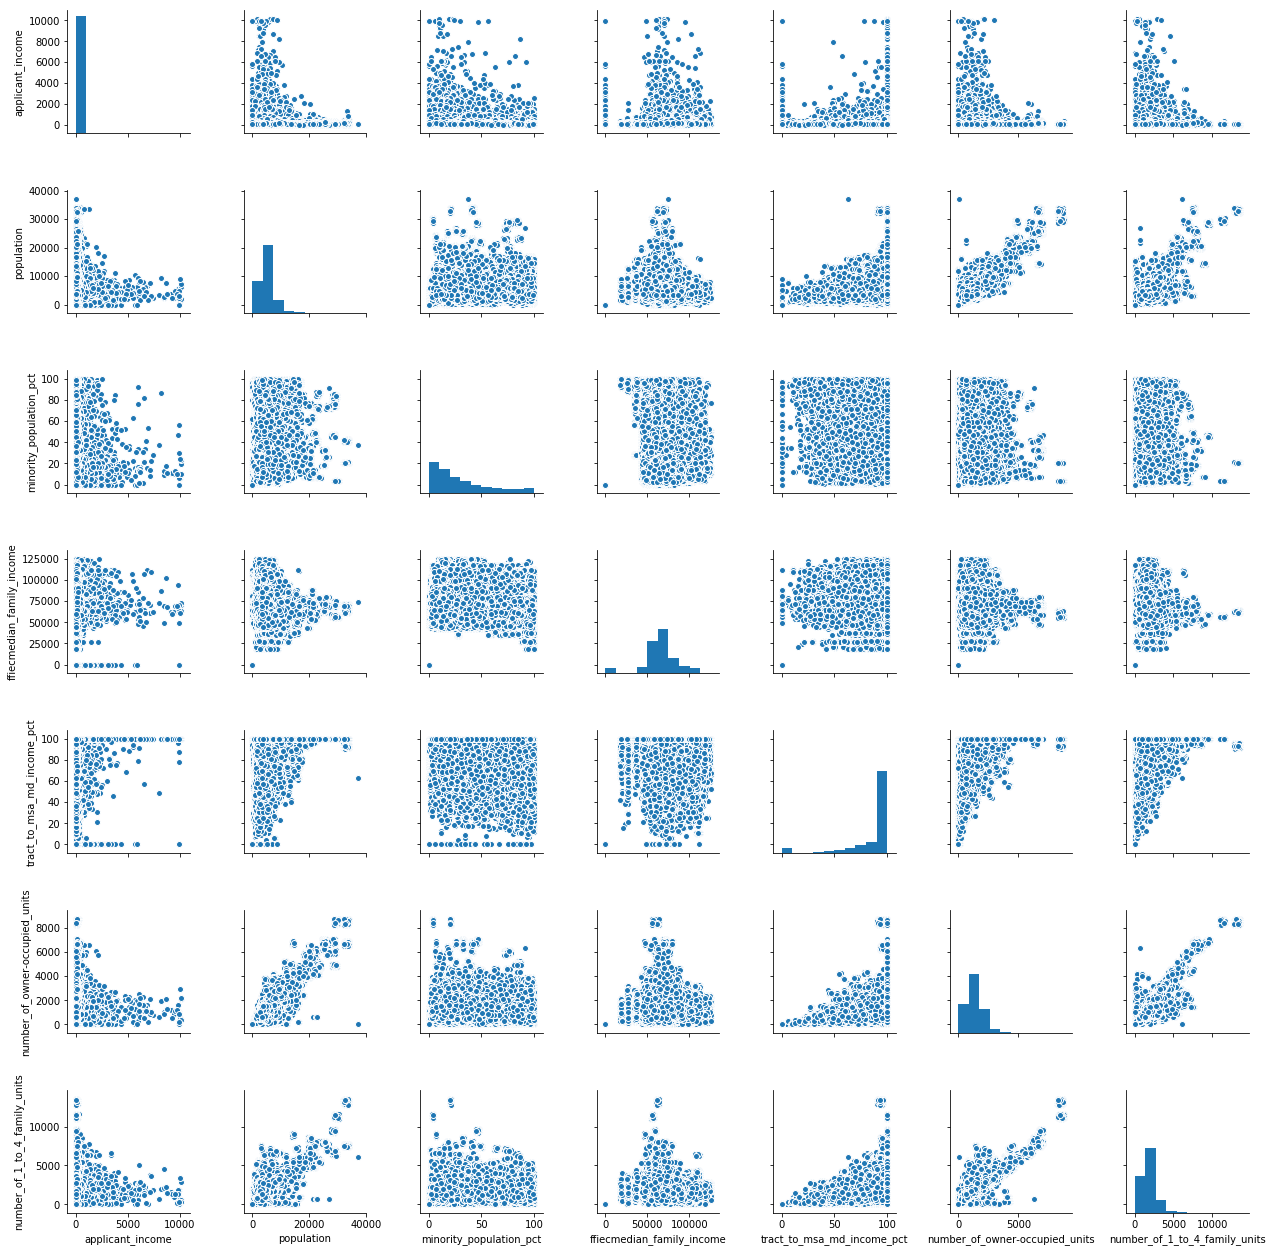

In [5]:
sns.pairplot(df, vars=['applicant_income', 'population','minority_population_pct','ffiecmedian_family_income','tract_to_msa_md_income_pct' ,'number_of_owner-occupied_units','number_of_1_to_4_family_units'])
plt.show()
plt.savefig('pairs.png')


#### Box Plots

Text(0.5,1,'Applicants Income by Acceptance Rate')

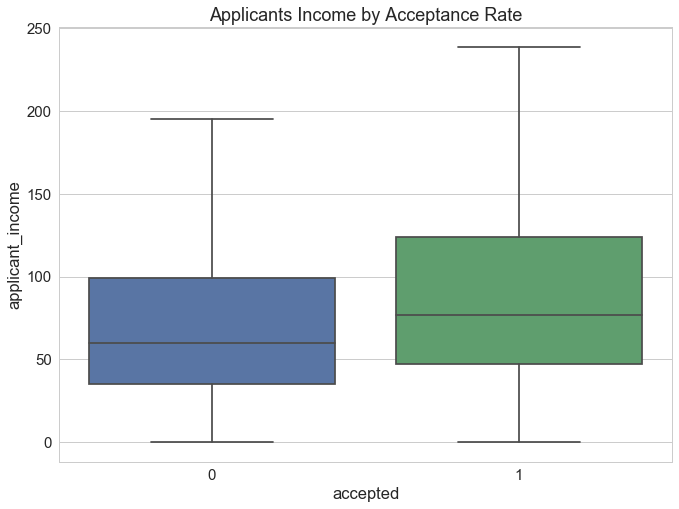

In [13]:
sns.boxplot(x="accepted", y="applicant_income", data=df, showfliers=False)
plt.title('Applicants Income by Acceptance Rate') 


Text(0.5,1,'Loan Amount by Acceptance Rate')

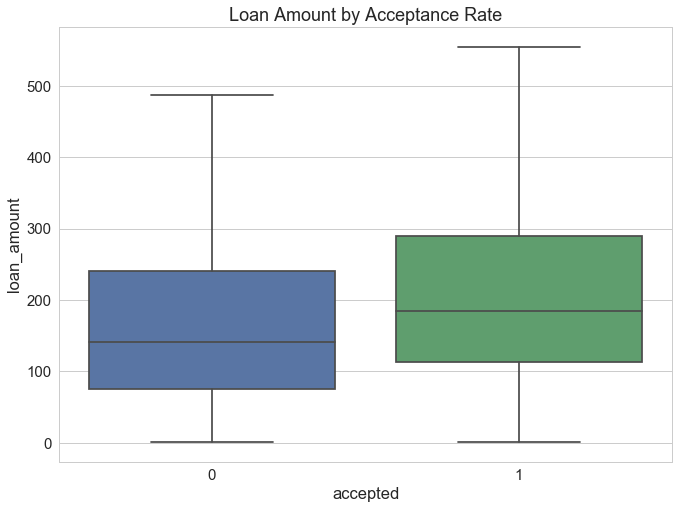

In [14]:
sns.boxplot(x="accepted", y="loan_amount", data=df, showfliers=False)
plt.title('Loan Amount by Acceptance Rate')

Text(0.5,1,'Ffiecmedian Family Income by Acceptance Rate')

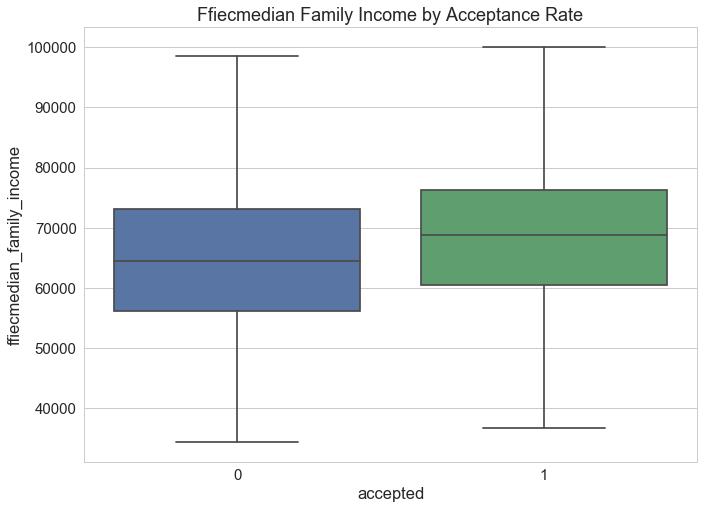

In [18]:
sns.boxplot(x="accepted", y="ffiecmedian_family_income", data=df, showfliers=False)
plt.title('Ffiecmedian Family Income by Acceptance Rate')

Text(0.5,1,'Ffiecmedian Family Income by Acceptance Rate')

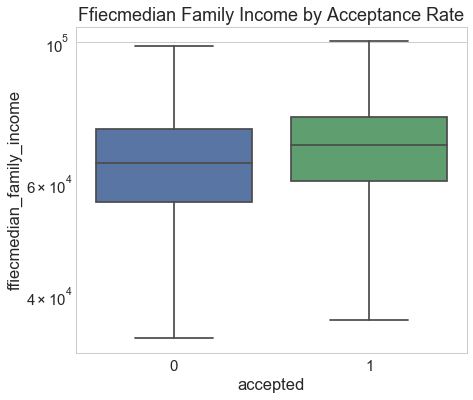

In [21]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.boxplot(x="accepted", y="ffiecmedian_family_income", data=df, showfliers=False)
plt.title('Ffiecmedian Family Income by Acceptance Rate')


Text(0.5,1,'Applicants Income by Acceptance Rate')

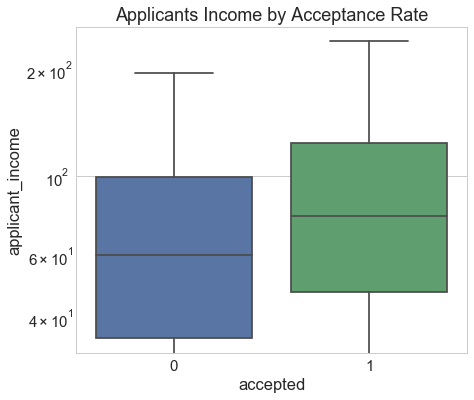

In [22]:
# Initialize the figure with a logarithmic y axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_yscale("log")
sns.boxplot(x="accepted", y="applicant_income", data=df, showfliers=False)
plt.title('Applicants Income by Acceptance Rate') 

### Histograms

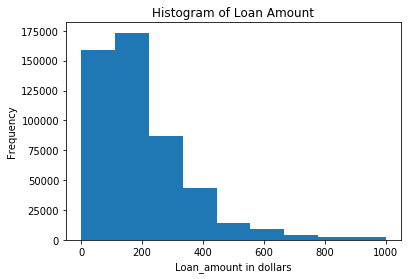

In [19]:
bins = np.linspace(0, 1000, 10)
y = df['loan_amount']

plt.hist(y, bins)
#plt.ylim((None, 160000))  # This line sets the y-axis limits
plt.title('Histogram of Loan Amount')
plt.xlabel('Loan_amount in dollars')
plt.ylabel('Frequency')

plt.show()

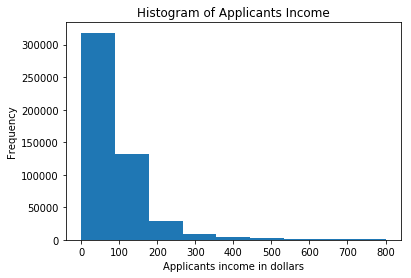

In [18]:
bins = np.linspace(0, 800, 10)
y = df['applicant_income']

plt.hist(y, bins)
#plt.ylim((None, 160000))  # This line sets the y-axis limits
plt.title('Histogram of Applicants Income')
plt.xlabel('Applicants income in dollars')
plt.ylabel('Frequency')

plt.show()

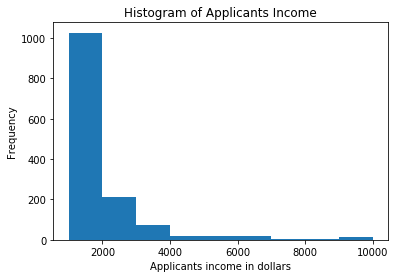

In [10]:
bins = np.linspace(1000, 10000, 10)
y = df['applicant_income']

plt.hist(y, bins)
#plt.ylim((None, 160000))  # This line sets the y-axis limits
plt.title('Histogram of Applicants Income')
plt.xlabel('Applicants income in dollars')
plt.ylabel('Frequency')

plt.show()